In [27]:
import pandas as pd

In [28]:
col_names = ["MPG", "Cylinders", "Displacement", "Horsepower", "Weight", "Acceleration", "Model Year", "Origin", "Car Name"]
df = pd.read_csv("../dataset/auto-mpg.data-original", names=col_names, header=None, delim_whitespace=True)
df.head()

C:\Users\swaya\AppData\Local\Temp\ipykernel_22028\4022271916.py:2: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv("../dataset/auto-mpg.data-original", names=col_names, header=None, delim_whitespace=True)


,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin,Car Name
0,18.0,8.0,307.0,130.0,3504.0,12.0,70.0,1.0,chevrolet chevelle malibu
1,15.0,8.0,350.0,165.0,3693.0,11.5,70.0,1.0,buick skylark 320
2,18.0,8.0,318.0,150.0,3436.0,11.0,70.0,1.0,plymouth satellite
3,16.0,8.0,304.0,150.0,3433.0,12.0,70.0,1.0,amc rebel sst
4,17.0,8.0,302.0,140.0,3449.0,10.5,70.0,1.0,ford torino


In [29]:
df[df.isnull().any(axis=1)]

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin,Car Name
10,NaN,4.0,133.0,115.0,3090.0,17.5,70.0,2.0,citroen ds-21 pallas
11,NaN,8.0,350.0,165.0,4142.0,11.5,70.0,1.0,chevrolet chevelle concours (sw)
12,NaN,8.0,351.0,153.0,4034.0,11.0,70.0,1.0,ford torino (sw)
13,NaN,8.0,383.0,175.0,4166.0,10.5,70.0,1.0,plymouth satellite (sw)
14,NaN,8.0,360.0,175.0,3850.0,11.0,70.0,1.0,amc rebel sst (sw)
17,NaN,8.0,302.0,140.0,3353.0,8.0,70.0,1.0,ford mustang boss 302
38,25.0,4.0,98.0,NaN,2046.0,19.0,71.0,1.0,ford pinto
39,NaN,4.0,97.0,48.0,1978.0,20.0,71.0,2.0,volkswagen super beetle 117
133,21.0,6.0,200.0,NaN,2875.0,17.0,74.0,1.0,ford maverick
337,40.9,4.0,85.0,NaN,1835.0,17.3,80.0,2.0,renault lecar deluxe


In [30]:
df.dropna(inplace=True)

In [31]:
df[df.isnull().any(axis=1)]

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin,Car Name


In [32]:
df = df.drop(["Car Name", "Origin"], axis=1)

In [33]:
df

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year
0,18.0,8.0,307.0,130.0,3504.0,12.0,70.0
1,15.0,8.0,350.0,165.0,3693.0,11.5,70.0
2,18.0,8.0,318.0,150.0,3436.0,11.0,70.0
3,16.0,8.0,304.0,150.0,3433.0,12.0,70.0
4,17.0,8.0,302.0,140.0,3449.0,10.5,70.0
...,...,...,...,...,...,...,...
401,27.0,4.0,140.0,86.0,2790.0,15.6,82.0
402,44.0,4.0,97.0,52.0,2130.0,24.6,82.0
403,32.0,4.0,135.0,84.0,2295.0,11.6,82.0
404,28.0,4.0,120.0,79.0,2625.0,18.6,82.0


dataset ready

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

In [35]:
df.corr()["MPG"].sort_values(ascending=True)

Weight         -0.832244
Displacement   -0.805127
Horsepower     -0.778427
Cylinders      -0.777618
Acceleration    0.423329
Model Year      0.580541
MPG             1.000000
Name: MPG, dtype: float64

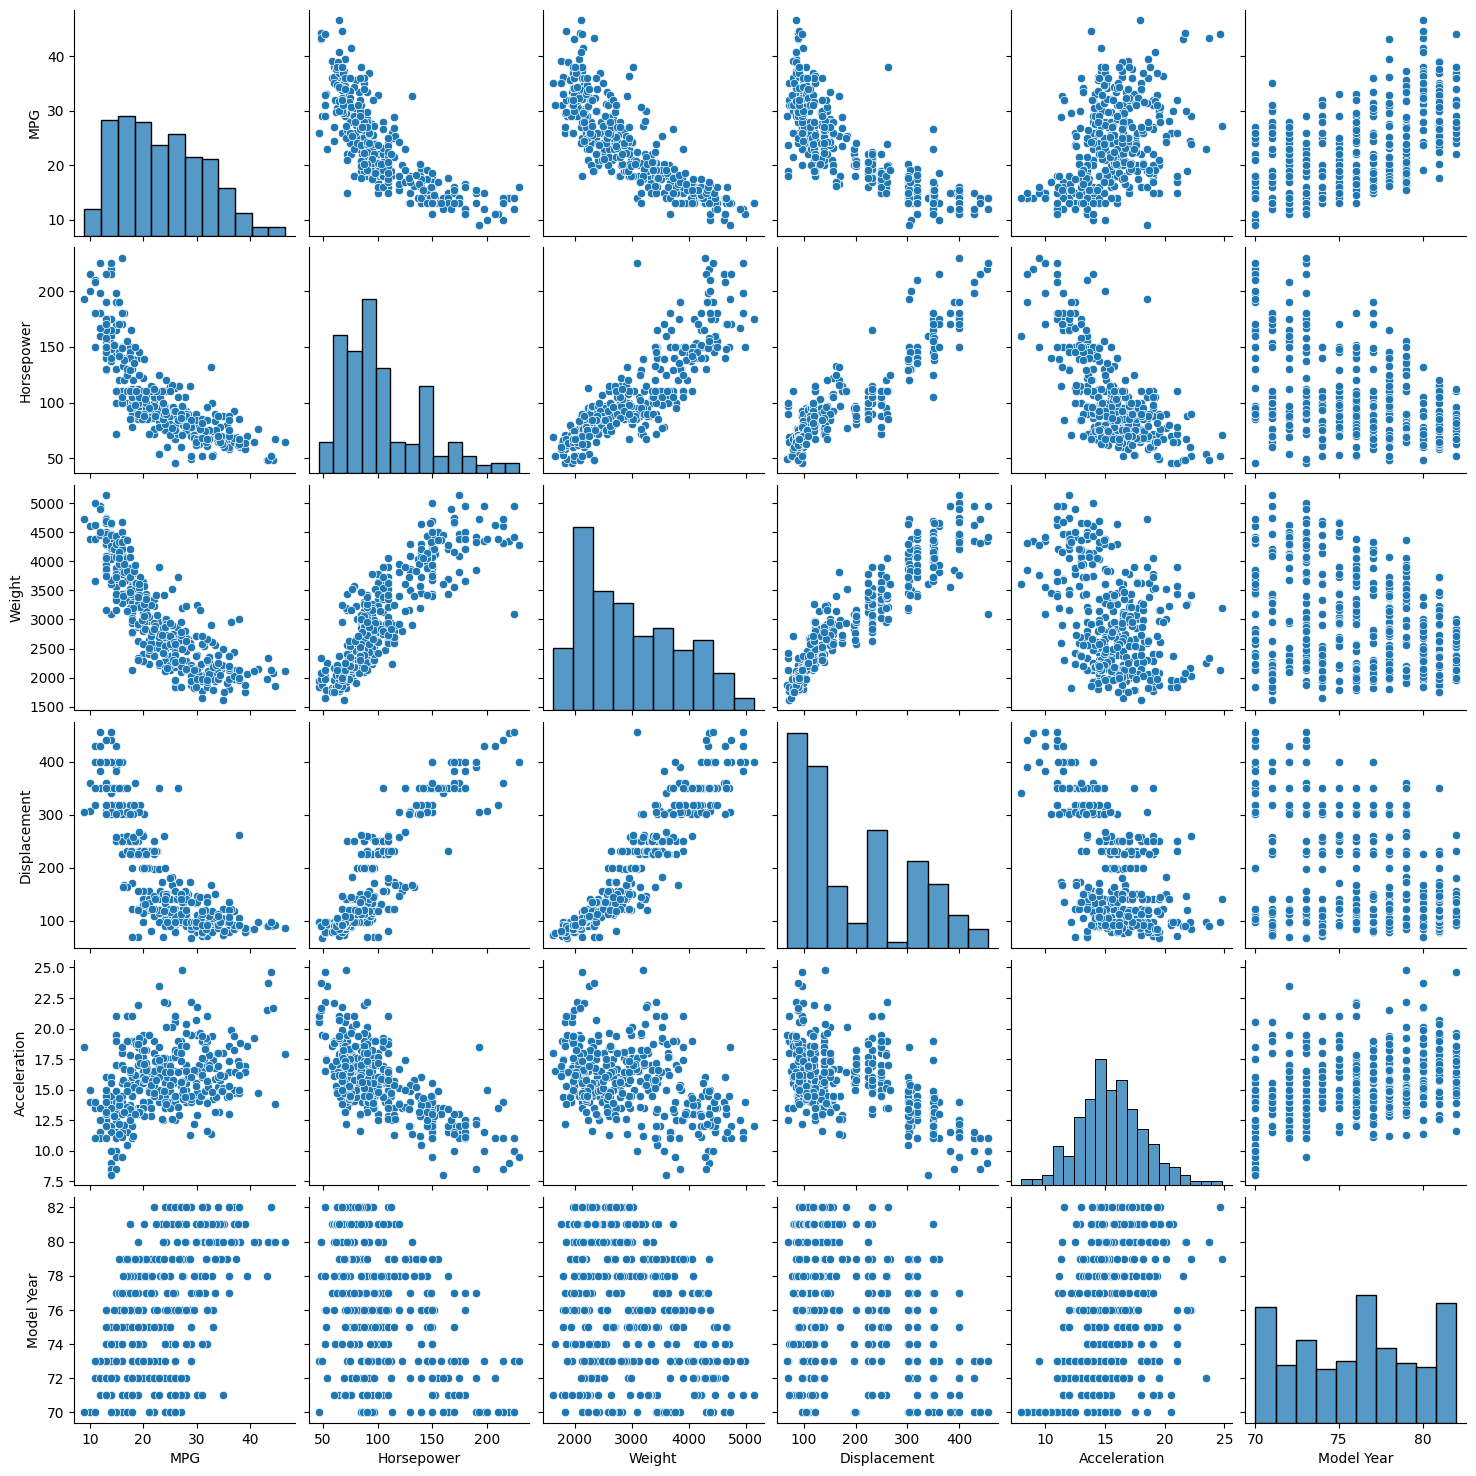

In [36]:
sns.pairplot(df, vars=["MPG", "Horsepower", "Weight", "Displacement", "Acceleration", "Model Year"])

In [37]:
plt.show()

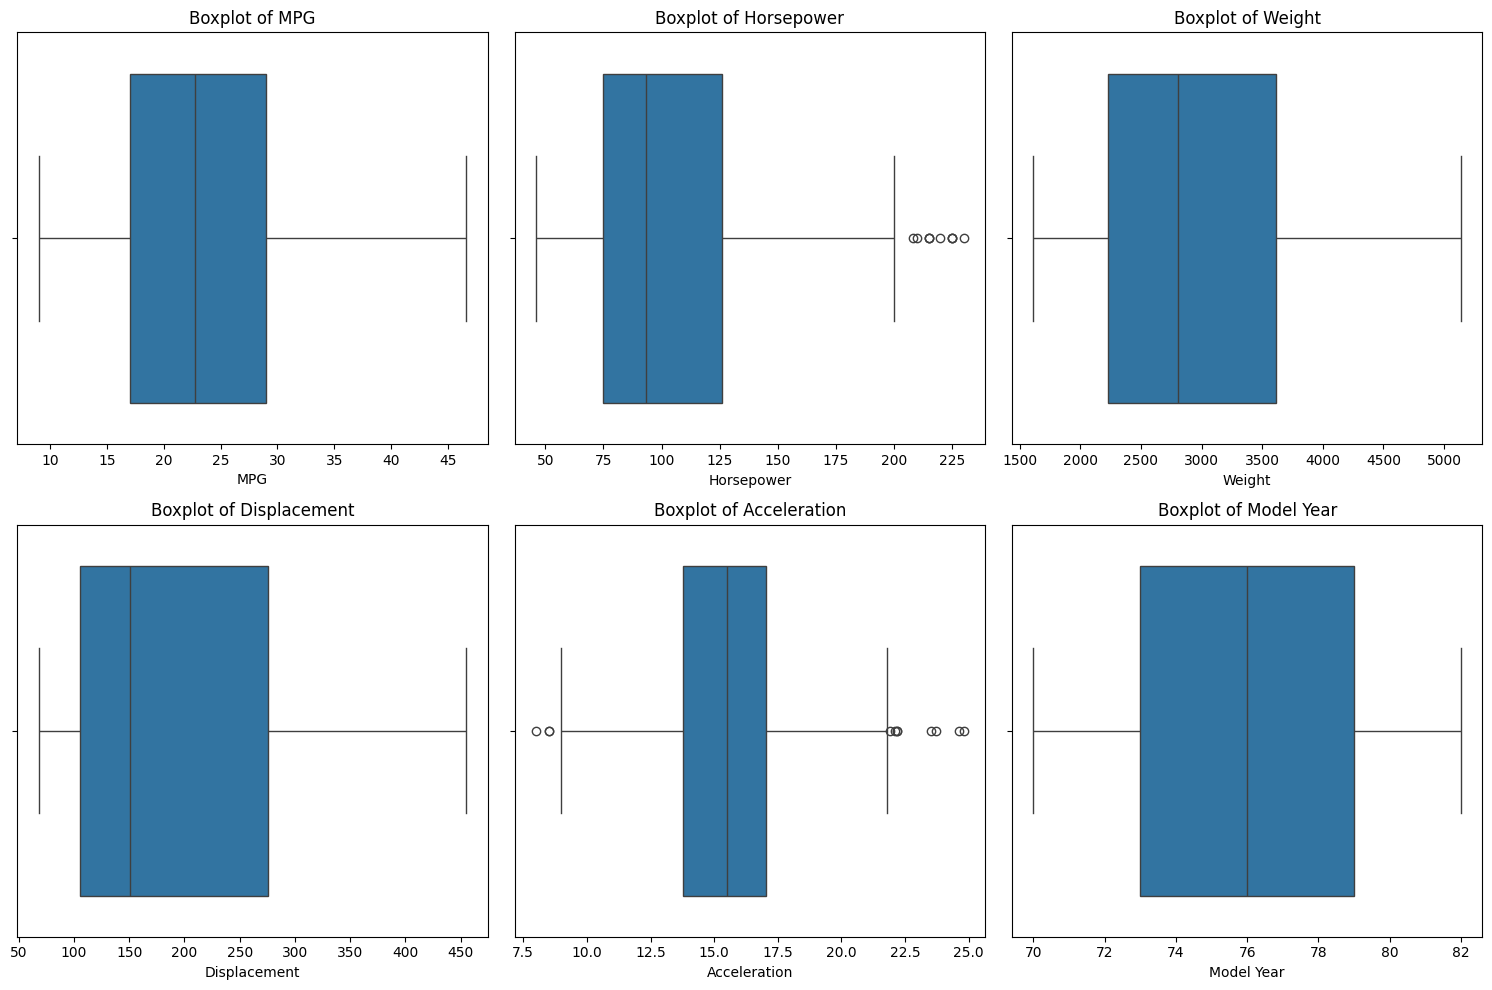

In [38]:
# Create a figure with subplots (2 rows, 3 columns)
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

# Define the columns to plot
columns = ['MPG', 'Horsepower', 'Weight', 'Displacement', 'Acceleration', 'Model Year']

# Flatten axes array for easy iteration
axes = axes.flatten()

# Loop through columns and create box plots
for i, col in enumerate(columns):
    sns.boxplot(data=df, x=col, ax=axes[i])
    axes[i].set_title(f'Boxplot of {col}')

# Adjust layout
plt.tight_layout()
plt.show()

<Axes: >

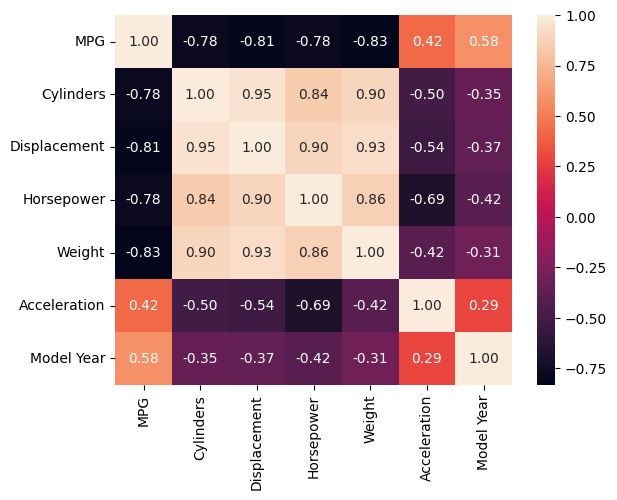

In [39]:
sns.heatmap(df.corr(), annot=True, fmt='.2f')

In [40]:
df.corr()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year
MPG,1.000000,-0.777618,-0.805127,-0.778427,-0.832244,0.423329,0.580541
Cylinders,-0.777618,1.000000,0.950823,0.842983,0.897527,-0.504683,-0.345647
Displacement,-0.805127,0.950823,1.000000,0.897257,0.932994,-0.543800,-0.369855
Horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361
Weight,-0.832244,0.897527,0.932994,0.864538,1.000000,-0.416839,-0.309120
Acceleration,0.423329,-0.504683,-0.543800,-0.689196,-0.416839,1.000000,0.290316
Model Year,0.580541,-0.345647,-0.369855,-0.416361,-0.309120,0.290316,1.000000


In [41]:
df.to_csv("cleaned_dataset.csv", index=False)